In [13]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split



In [14]:
df=pd.read_csv('Salary_Data_Based_country_and_race.csv')

In [15]:
df

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [16]:
df.drop(columns=['Unnamed: 0','Race'],inplace=True)

In [17]:
df=df[~(df.Gender.isna())]

In [18]:


# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Gender']),
                                                 df['Gender'],
                                                 test_size=0.2,
                                                random_state=42)

In [19]:
X_train.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Country
4941,26.0,Bachelor's Degree,Senior Product Marketing Manager,5.0,85000.0,China
135,39.0,Bachelor's,Administrative Assistant,10.0,55000.0,Canada
2253,22.0,Bachelor's Degree,Front End Developer,1.0,50000.0,Australia
3430,32.0,Bachelor's Degree,Junior Web Developer,2.0,45000.0,Canada
5358,27.0,Bachelor's Degree,Marketing Analyst,2.0,50000.0,Australia


In [20]:
X_train.isnull().sum()

Age                    0
Education Level        1
Job Title              0
Years of Experience    1
Salary                 3
Country                0
dtype: int64

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(strategy='most_frequent'),[1,2,3,4]),
],remainder='passthrough')

In [22]:
X_train.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Country
4941,26.0,Bachelor's Degree,Senior Product Marketing Manager,5.0,85000.0,China
135,39.0,Bachelor's,Administrative Assistant,10.0,55000.0,Canada
2253,22.0,Bachelor's Degree,Front End Developer,1.0,50000.0,Australia
3430,32.0,Bachelor's Degree,Junior Web Developer,2.0,45000.0,Canada
5358,27.0,Bachelor's Degree,Marketing Analyst,2.0,50000.0,Australia


In [23]:
y_train.isna().sum()

0

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# one hot encoding
trf2 = ColumnTransformer([
    ('ohe_trans',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,5])
],remainder='passthrough')

In [50]:
from sklearn.preprocessing import MinMaxScaler

# Scaling
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,1))
])

In [51]:
from sklearn.linear_model import LogisticRegression

# train the model
trf4 =LogisticRegression()

In [52]:
from sklearn.pipeline import Pipeline,make_pipeline

pipe = Pipeline([
                ('trf1',trf1),
                ('trf2',trf2),
                ('trf3',trf3),
                ('trf4',trf4)
                
            ])

In [53]:
pipe.fit(X_train,y_train)
#pipe=make_pipeline(trf1,trf2,trf3,trf4)

C:\Users\nabee\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [1, 2, 3, 4])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_trans',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 5])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 1, None))])),
                ('trf4', LogisticRegression())])

In [54]:
#code here
#pipe.named_steps
#import seaborn as sns
#sns.pairplot(,hue='Gender')

In [55]:
from sklearn import set_config
set_config()

In [56]:
y_pred=pipe.predict(X_test)

In [57]:
y_pred

array(['Male', 'Male', 'Male', ..., 'Male', 'Male', 'Male'], dtype=object)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5734526472781506

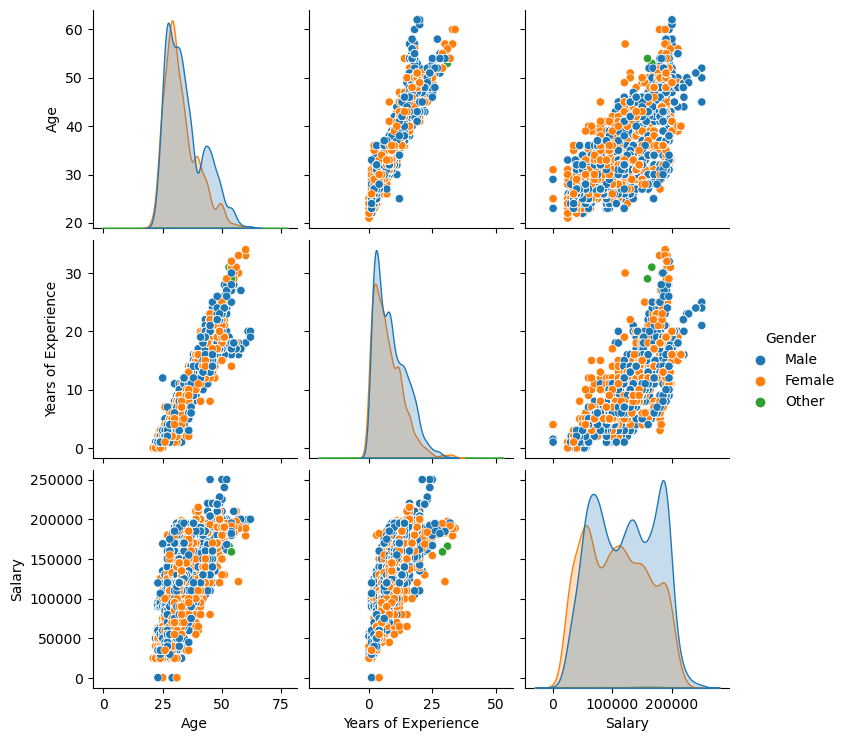

In [60]:
import seaborn as sns
sns.pairplot(df,hue='Gender')